In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import bq_helper
stackoverflow = bq_helper.BigQueryHelper("bigquery-public-data","stackoverflow")
# Any results you write to the current directory are saved as output.

Using Kaggle's public dataset BigQuery integration.


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
stackoverflow.list_tables()

['badges',
 'comments',
 'post_history',
 'post_links',
 'posts_answers',
 'posts_moderator_nomination',
 'posts_orphaned_tag_wiki',
 'posts_privilege_wiki',
 'posts_questions',
 'posts_tag_wiki',
 'posts_tag_wiki_excerpt',
 'posts_wiki_placeholder',
 'stackoverflow_posts',
 'tags',
 'users',
 'votes']

In [46]:
stackoverflow.table_schema('posts_questions')

,name,type,mode,description
0,id,INTEGER,NULLABLE,None
1,title,STRING,NULLABLE,None
2,body,STRING,NULLABLE,None
3,accepted_answer_id,INTEGER,NULLABLE,None
4,answer_count,INTEGER,NULLABLE,None
5,comment_count,INTEGER,NULLABLE,None
6,community_owned_date,TIMESTAMP,NULLABLE,None
7,creation_date,TIMESTAMP,NULLABLE,None
8,favorite_count,INTEGER,NULLABLE,None
9,last_activity_date,TIMESTAMP,NULLABLE,None


In [47]:
stackoverflow.head('posts_questions', 1)

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,57422054,Acrobat reader cannot extract the embedded fon...,<p>I am using Jasper Report 6.9.0 version with...,None,2,0,None,2019-08-09 00:09:38.900000+00:00,None,2019-08-22 16:37:11.660000+00:00,2019-08-09 18:25:09.417000+00:00,None,876298,None,2698795,None,1,2,jasper-reports|acrobat|export-to-pdf,256


In [48]:
perg = """ select extract(year from creation_date) as ano, tags, view_count
    from `bigquery-public-data.stackoverflow.posts_questions`
    where tags like '%java%' or tags like 'javascript'or tags like '%python%' or 
    tags like '%c#%' or tags like '%php%' or tags like 'c++' or tags like '%c%' or tags like '%typescript%' or
    tags like '%ruby%' or tags like '%swift%'  
    
    """

perguntas = stackoverflow.query_to_pandas(perg)
perguntas.head()

Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x7fa2c46350d0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/weakref.py", line 109, in remove
    def remove(wr, selfref=ref(self), _atomic_removal=_remove_dead_weakref):
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
list_anos = sorted(list(set(list(perguntas['ano']))))
list_anos

In [ ]:
list_tags = list(perguntas['tags'])
list_tags[:5:]

In [ ]:
list_views = list(perguntas['view_count'])
list_views[:5:]

In [50]:
list_ano_t = list(perguntas['ano'])
list_ano_t[:5:]

[2019, 2019, 2019, 2019, 2019]

In [59]:
dic_javascript = {'ano': list_anos, 
            'perguntas': [len([list_tags[j] for j in range(len(list_tags)) if 'javascript' in list_tags[j] and i == list_ano_t[j]]) for i in list_anos],
            'views_count': [sum([list_views[j] for j in range(len(list_views)) if 'javascript' in list_tags[j] and i == list_ano_t[j]]) for i in list_anos]}
dic_javascript

{'ano': [2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019],
 'perguntas': [2741,
  18833,
  43759,
  91282,
  138419,
  198113,
  237757,
  257392,
  265771,
  251540,
  218294,
  147736],
 'views_count': [170678281,
  445370441,
  440234778,
  637882067,
  638450164,
  654311919,
  409801306,
  318422679,
  253290207,
  165648474,
  67832839,
  11668753]}

In [51]:
dic_java = {'ano': list_anos, 
            'perguntas': [len([list_tags[j] for j in range(len(list_tags)) if 'java' in list_tags[j] and i == list_ano_t[j]]) for i in list_anos],
            'views_count': [sum([list_views[j] for j in range(len(list_views)) if 'java' in list_tags[j] and i == list_ano_t[j]]) for i in list_anos]}
dic_java

{'ano': [2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019],
 'perguntas': [7142,
  43502,
  99408,
  193504,
  288233,
  394145,
  460037,
  478346,
  468322,
  432225,
  376961,
  253780],
 'views_count': [335119337,
  868950749,
  1026292141,
  1374532634,
  1357168396,
  1359456012,
  853314240,
  625196908,
  448086042,
  287445859,
  118699614,
  20273820]}

### JavaScript é um nome que contém a palavra java por isso todos os valores de Java devem ser subtraidos de JavaScript.

In [61]:
# Não reproduzir essa célula novamente
"""
for i in range(len(dic_java['ano'])):
    dic_java['perguntas'][i] = dic_java['perguntas'][i] - dic_javascript['perguntas'][i]
    dic_java['views_count'][i] = dic_java['views_count'][i] - dic_javascript['views_count'][i]
"""

In [63]:
dt_java = pd.DataFrame(dic_java)
dt_java.head()

,ano,perguntas,views_count
0,2008,4401,164441056
1,2009,24669,423580308
2,2010,55649,586057363
3,2011,102222,736650567
4,2012,149814,718718232


In [62]:
dt_javascript = pd.DataFrame(dic_javascript)
dt_javascript.head()

,ano,perguntas,views_count
0,2008,2741,170678281
1,2009,18833,445370441
2,2010,43759,440234778
3,2011,91282,637882067
4,2012,138419,638450164


In [ ]:
#perguntas.to_csv(r'perguntas.csv')

In [ ]:
#from IPython.display import FileLink
#FileLink(r'perguntas.csv')

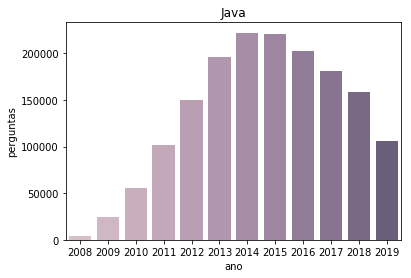

In [68]:
pallete = sns.cubehelix_palette(12, 3, 0.4, 0.5, 0.5, 0.6)

sns.barplot(dt_java['ano'], dt_java['perguntas'], palette=pallete)
plt.title("Java")
plt.savefig('java_bar.pdf')
plt.show()

In [73]:
dic_python = {'ano': list_anos, 
            'perguntas': [len([list_tags[j] for j in range(len(list_tags)) if 'python' in list_tags[j] and i == list_ano_t[j]]) for i in list_anos],
            'views_count': [sum([list_views[j] for j in range(len(list_views)) if 'python' in list_tags[j] and i == list_ano_t[j]]) for i in list_anos]}
dic_python

{'ano': [2008,
  2009,
  2010,
  2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2019],
 'perguntas': [2108,
  13227,
  27573,
  43144,
  66824,
  102279,
  124073,
  147820,
  174022,
  214212,
  242823,
  200976],
 'views_count': [142541653,
  326911709,
  360293298,
  392142469,
  434170161,
  460626332,
  304465290,
  262859843,
  225206981,
  189997242,
  89448926,
  16151934]}

In [74]:
dt_python = pd.DataFrame(dic_python)
dt_python

,ano,perguntas,views_count
0,2008,2108,142541653
1,2009,13227,326911709
2,2010,27573,360293298
3,2011,43144,392142469
4,2012,66824,434170161
5,2013,102279,460626332
6,2014,124073,304465290
7,2015,147820,262859843
8,2016,174022,225206981
9,2017,214212,189997242


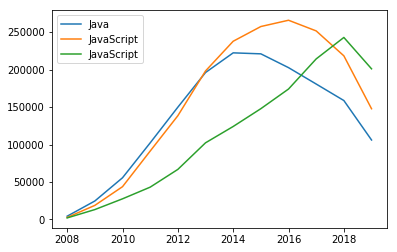

In [76]:
fig, ax = plt.subplots()

line1, = ax.plot(dt_java['ano'], dt_java['perguntas'], label='Java')

line2, = ax.plot(dt_javascript['ano'], dt_javascript['perguntas'], label='JavaScript')
line3, = ax.plot(dt_python['ano'], dt_python['perguntas'], label='JavaScript')

ax.legend()
plt.show()